# 4. Data Cleaning Columns (TPE) 
4-1. Storeys (總樓層數)   
4-2. Floor (樓層)  
4-3. House Age (屋齡)   
4-4. Elevator (電梯)   
4-5. Number of Transactions (交易筆棟數)  
4-6. Material (主要建材)   
4-7. District (區)   
4-8. Partitions/Management (隔間/管理組織)   
4-9. Bedrooms/LivingRooms/Bathrooms (房廳衛)

In [1]:
#載入套件
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import missingno as msno

#匯入自己寫的程式
import dataframe_format as ff
import data_cleansing_columns as dcc
import data_cleansing_transform as dct
import human_read_data as hr

In [2]:
df = pd.read_csv('3_data_cleaning_address.csv', low_memory=False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151932 entries, 0 to 151931
Data columns (total 50 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Identifier            151932 non-null  object 
 1   Address               151932 non-null  object 
 2   Type                  151932 non-null  object 
 3   UrbanZoning           151110 non-null  object 
 4   Purpose               151932 non-null  object 
 5   Material              151908 non-null  object 
 6   NumberOfTransactions  151932 non-null  object 
 7   Storeys               151617 non-null  object 
 8   Floor                 151791 non-null  object 
 9   CompletionDate        140281 non-null  float64
 10  TransactionDate       151932 non-null  int64  
 11  Bedrooms              151932 non-null  int64  
 12  LivingRooms           151932 non-null  int64  
 13  Bathrooms             151932 non-null  int64  
 14  Partitions            151932 non-null  object 
 15  

,Identifier,Address,Type,UrbanZoning,Purpose,Material,NumberOfTransactions,Storeys,Floor,CompletionDate,...,Hospital,Hospital_Dist,Metro_Station,Metro_Dist,Railway,Railway_Dist,Primary_School,Primary_Dist,Secondary_School,Sec_Dist
0,RPQNMLMJJIHFFAA98CA,台北市文山區興隆路四段145巷25號7樓,住宅大樓(11層含以上有電梯),住,住家用,鋼筋混凝土造,土地1建物1車位1,十四層,七層,891122.0,...,臺北市立萬芳醫院,1677.933925,萬芳社區,1575.080796,松山站,7272.308437,市立實踐國小,32.314377,私立景文高中附設國中部,460.068302
1,RPSNMLMJJIHFFAA56CA,台北市文山區指南路三段22巷8弄5號6樓,華廈(10層含以下有電梯),住,住家用,鋼筋混凝土造,土地1建物1車位0,七層,六層，電梯樓梯間,861213.0,...,臺北市立萬芳醫院,2801.051060,動物園,1661.027469,松山站,7309.471279,國立政大實小,161.685187,市立北政國中,160.176142
2,RPQNMLNJJIHFFAA09CA,台北市文山區文山區木新路3段50巷7弄11號,公寓(5樓含以下無電梯),住,住家用,鋼筋混凝土造,土地1建物1車位0,四層,一層，平台,NaN,...,臺北市立萬芳醫院,1969.616513,萬芳社區,1811.487456,松山站,7524.094945,市立實踐國小,259.510940,私立景文高中附設國中部,464.558824
3,RPXOMLQJJIHFFAA57CA,台北市文山區興隆路二段233巷5弄18號八樓,華廈(10層含以下有電梯),住,住家用,鋼筋混凝土造,土地2建物1車位1,九層,八層,981118.0,...,臺北市立萬芳醫院,827.593155,辛亥,741.470209,松山站,5966.722397,市立興德國小,71.688533,市立興福國中,302.054926
4,RPUOMLNLJIHFFAA17CA,台北市文山區羅斯福路五段218巷38弄15號十一樓,套房(1房1廳1衛),住,住家用,鋼筋混凝土造,土地0建物1車位0,十六層,十一層,860815.0,...,佛教慈濟醫療財團法人台北慈濟醫院,1842.879689,萬隆,224.857500,萬華站,5042.524883,市立萬福國小,244.259466,市立民族實驗國中,936.289347


# 4-1. Storeys (總樓層數)

In [3]:
# Storeys轉阿拉伯數字
df = dcc.storeys_to_arabic(df)

Converting "Storeys" from str to int...
Finish!
總筆數: 151932
Storeys 缺失值數量: 311


In [4]:
df['Storeys'].describe()

count    151621.000000
mean          9.977279
std           5.768252
min           1.000000
25%           5.000000
50%           9.000000
75%          14.000000
max          42.000000
Name: Storeys, dtype: float64

# 4-2. Floor (樓層)
將Floor中的文字，轉為3欄: Num_Floors(層數, int)、Floor_Arabic(樓層, int)、Basement(地下室, Boolin)

In [5]:
df = dct.floor_to_arabic(df)
# --------------------------------------------
# Step1. Floor空值，抓取地址資訊補值(仍有空值)
# Step2. Floor為'全'，Num_Floors和Floor_Arabic = Storeys   
# Step3. 將中文"樓層"，轉int，並計算層數
# 下列印出的9筆交易，因非住宅房屋，予以刪除

Changing "Floor" to 3 columns: Floor_Arabic, Num_Floors, Basement...
非住宅房屋: 13861, 屋頂突出物
非住宅房屋: 33691, 陽台，見其他登記事項
非住宅房屋: 46467, 屋頂突出物
非住宅房屋: 57690, 夾層
非住宅房屋: 63667, 陽台，屋頂突出物
非住宅房屋: 73847, 陽台，屋頂突出物
非住宅房屋: 82908, 防空避難室，停車場
非住宅房屋: 83834, 屋頂突出物
非住宅房屋: 124768, 屋頂突出物
刪除筆數: 9
保留總筆數: 151923


In [6]:
#查看 Num_Floors/ Floor_Arabic/ Basement缺失值數量
missing_values = df.isna().sum()
#print(missing_values)
print('Floor_Arabic 缺失值: {}'.format(missing_values['Floor_Arabic']))
print('Num_Floors 缺失值: {}'.format(missing_values['Num_Floors']))
print('Basement 缺失值: {}'.format(missing_values['Basement']))

Floor_Arabic 缺失值: 261
Num_Floors 缺失值: 261
Basement 缺失值: 0


In [7]:
df[['Floor_Arabic', 'Num_Floors']].describe().T

,count,mean,std,min,25%,50%,75%,max
Floor_Arabic,151662.0,5.913472,4.236016,0.0,3.0,5.0,8.0,42.0
Num_Floors,151662.0,1.042430,0.309823,1.0,1.0,1.0,1.0,23.0


In [8]:
df = df[(df['Floor_Arabic'] > 0)]
print(f'row_count: {len(df)}')

row_count: 151551


<Axes: >

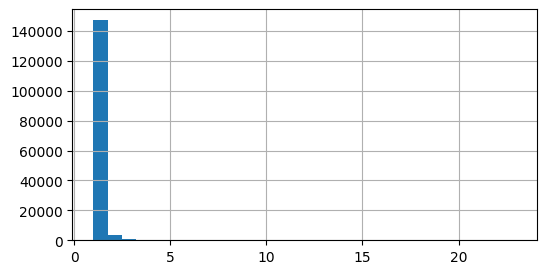

In [9]:
df['Num_Floors'].hist(figsize=(6,3),bins=30)

In [10]:
df = df[(df['Num_Floors'] < 10)]
print(f'row_count: {len(df)}')

row_count: 151529


In [11]:
df.to_csv('floor_to_arabic.csv', encoding='utf-8-sig', index=False)

# 4-3. House Age (屋齡)
屋齡 (年) = 交易日期 - 完工日期

In [12]:
# 計算屋齡 HouseAge
df = pd.read_csv('floor_to_arabic.csv', low_memory=False)
df = dct.house_age(df)

Calculating HouseAge...
Finish!
總筆數: 151529
TransactionDate_AD 缺失值數量: 0
CompletionDate_AD 缺失值數量: 11604
HouseAge 缺失值數量: 11604


In [13]:
df = dct.transaction_filter(df, 2012)

Before delete: 151529
Drop: 1781
After delete: 149748


In [14]:
df['HouseAge'].describe()

count    138146.000000
mean         19.992682
std          16.605064
min          -7.000000
25%           4.000000
50%          19.000000
75%          35.000000
max          97.000000
Name: HouseAge, dtype: float64

In [15]:
df.to_csv('house_age.csv', encoding='utf-8-sig', index=False)

# 4-4. Elevator (電梯)
電梯補值，根據Type(建物型態)

In [16]:
#電梯補值
df = pd.read_csv('house_age.csv', low_memory=False)
df = dcc.elevator_null(df)

Extracting "Elevator" information from the "Type" column...
Finish!
總筆數: 149748
缺失值數目: 0


In [17]:
# Type清除括號內文字
df = dcc.clean_type(df)
print(df['Type'].unique())

Removing '(text)' in the "Type" column...
Finish!
總筆數: 149748
Type 缺失值數量: 0
['住宅大樓' '華廈' '公寓' '套房' '透天']


In [18]:
# 將'Type'內文字轉英文
type_map = {'住宅大樓': 'Luxury_Condo', '華廈': 'Condo', '公寓': 'Apartment', '套房': 'Studio', '透天': 'House'}
df['Type'] = df['Type'].replace(type_map)
print(df['Type'].unique())

['Luxury_Condo' 'Condo' 'Apartment' 'Studio' 'House']


In [19]:
df.to_csv('clean_type.csv', encoding='utf-8-sig', index=False)

# 4-5. Number of Transactions (交易筆棟數)
轉成3欄 (Land, Building, ParkingSpace)，int

In [20]:
df = pd.read_csv('clean_type.csv', low_memory=False)

In [21]:
# 交易筆棟數轉3欄 (Num_Land, Num_Building, Num_ParkingSpace)
df = dct.number_of_transactions(df)

Changing " 交易筆棟數" to 3 columns: Num_Land, Num_Building, Num_ParkingSpace...
Finish!
總筆數: 149748
缺失值數量: 0
錯誤筆數: 0


In [22]:
df[['Num_Land', 'Num_Building', 'Num_ParkingSpace']].describe().T
orig_rows = len(df)

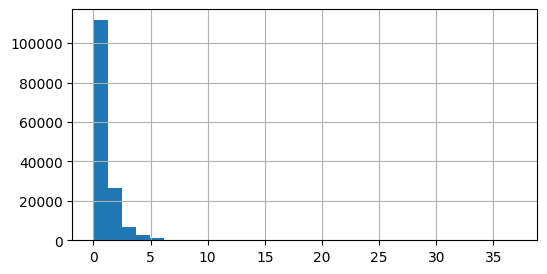

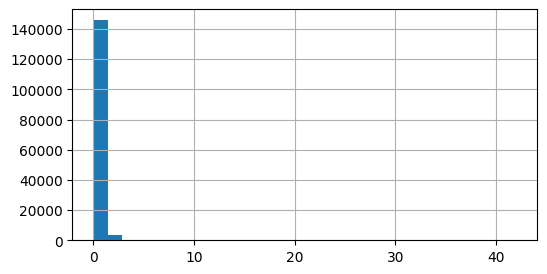

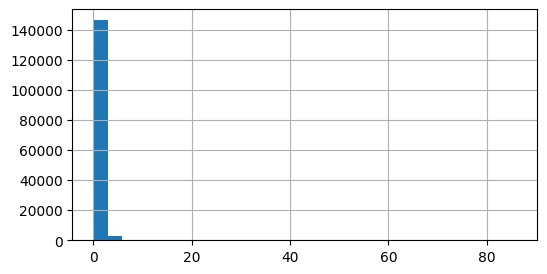

In [23]:
columns = ['Num_Land', 'Num_Building', 'Num_ParkingSpace']
for name in columns:
    df[name].hist(figsize=(6,3),bins=30)
    plt.show()

In [24]:
#print('Num_Land: 1-10, Num_Building: 1-10, Num_ParkingSpace: 0-20')
df = df[(df['Num_Land'].astype(int) <= 10)]
df = df[(df['Num_Building'].astype(int) <= 10)]
df = df[(df['Num_ParkingSpace'].astype(int) <= 20)]

In [25]:
print(orig_rows - len(df))
df[['Num_Land', 'Num_Building', 'Num_ParkingSpace']].describe().T

344


,count,mean,std,min,25%,50%,75%,max
Num_Land,149404.0,1.391000,0.882940,0.0,1.0,1.0,2.0,10.0
Num_Building,149404.0,1.030822,0.216936,0.0,1.0,1.0,1.0,10.0
Num_ParkingSpace,149404.0,0.510321,0.794026,0.0,0.0,0.0,1.0,16.0


# 4-6. Material (主要建材)
分成5類: SC, SRC, RC, RB, Others

In [26]:
# 建材分成5類: SC, SRC, RC, RB, Others
df = dcc.material(df)

Categorizing "Material" into five categories: SC, SRC, RC, RB, Others...
Finish!
總筆數: 149404
缺失值數量: 0


# 4-7. District (區)

In [27]:
# 將'District'轉成英文(繪圖軟體不支援中文格式)
df = dcc.district_english(df, 'tpe')

# 4-7. UnitPrice (價格/平方公尺)

In [28]:
#df = dcc.unit_price(df)

In [29]:
# 查看 UnitPrice 缺失值数量
#missing_values = df.isna().sum()
#print('UnitPrice 缺失值: {}'.format(missing_values['UnitPrice']))
#print('UnitPrice dtypes: {}'.format(df['UnitPrice'].dtypes))

# 4-8. Partitions/Management (隔間/管理組織)

In [30]:
# Partitions缺失值數量
print(f"總筆數: {len(df)}")
print(f"Partitions 缺失值數量: {len(df) - df['Partitions'].count()}")

總筆數: 149404
Partitions 缺失值數量: 0


In [31]:
# Partitions/Management str 轉 bool
df = dcc.partitions(df)
df = dcc.management(df)

Converting "Partitions" from str to bool...
Finish!
Converting "Management" from str to bool...
Finish!


In [32]:
df.to_csv('partitions.csv', encoding='utf-8-sig', index=False)

# 4-9. Bedrooms/LivingRooms/Bathrooms (房廳衛)

In [33]:
df = pd.read_csv('partitions.csv', low_memory=False)

In [34]:
df[['Bedrooms', 'LivingRooms', 'Bathrooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
Bedrooms,149404.0,2.475630,1.321142,0.0,2.0,3.0,3.0,68.0
LivingRooms,149404.0,1.595935,0.706759,0.0,1.0,2.0,2.0,22.0
Bathrooms,149404.0,1.581765,0.889406,0.0,1.0,2.0,2.0,44.0


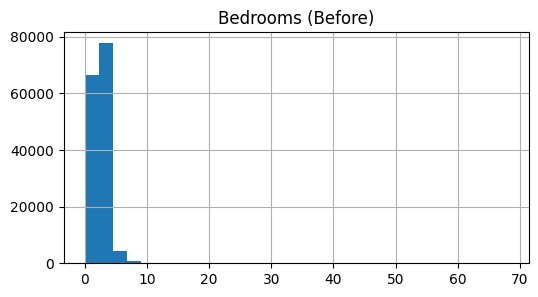

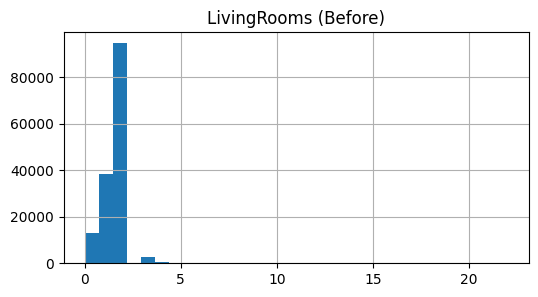

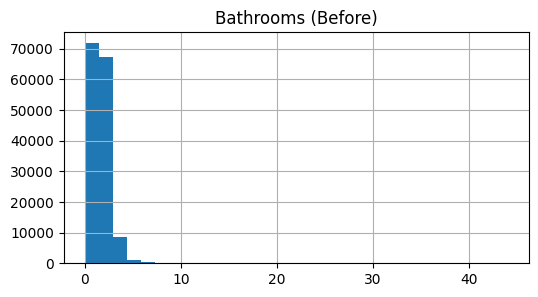

In [35]:
columns = ['Bedrooms', 'LivingRooms', 'Bathrooms']
for name in columns:
    df[name].hist(figsize=(6,3),bins=30)
    plt.title(name + ' (Before)')
    plt.show()

In [36]:
#print('Bedrooms: 1-10, LivingRooms: 0-10, Bathrooms: 1-10')
orig_rows = len(df)
df = df[(df['Bedrooms'].astype(int) <= 15)]
df = df[(df['LivingRooms'].astype(int) <= 10)]
df = df[(df['Bathrooms'].astype(int) <= 10)]
print(orig_rows - len(df))

49


In [37]:
df[['Bedrooms', 'LivingRooms', 'Bathrooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
Bedrooms,149355.0,2.470992,1.283055,0.0,2.0,3.0,3.0,15.0
LivingRooms,149355.0,1.595527,0.700986,0.0,1.0,2.0,2.0,9.0
Bathrooms,149355.0,1.578200,0.856158,0.0,1.0,2.0,2.0,10.0


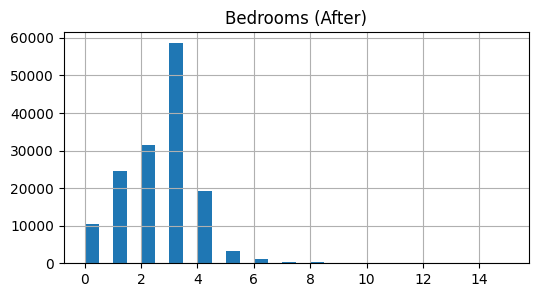

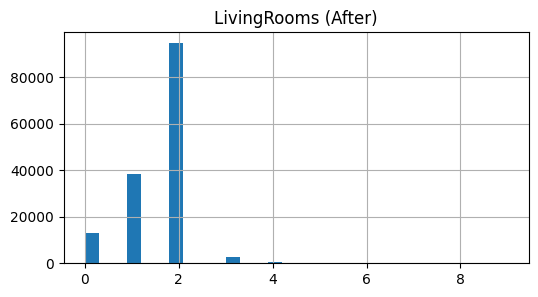

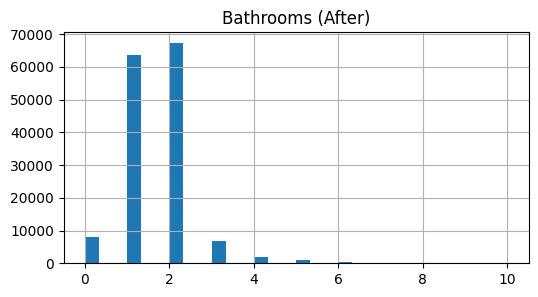

In [38]:
columns = ['Bedrooms', 'LivingRooms', 'Bathrooms']
for name in columns:
    df[name].hist(figsize=(6,3),bins=30)
    plt.title(name + ' (After)')
    plt.show()

In [39]:
df.to_csv('4_data_cleaning_columns.csv', encoding='utf-8-sig', index=False)

# 缺失值 matrix

In [9]:
df = pd.read_csv('4_data_cleaning_columns.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149355 entries, 0 to 149354
Data columns (total 58 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Address             149355 non-null  object 
 1   Address_gis         149355 non-null  object 
 2   AuxiliaryArea       149355 non-null  float64
 3   BalconyArea         149355 non-null  float64
 4   Basement            149355 non-null  bool   
 5   Bathrooms           149355 non-null  int64  
 6   Bedrooms            149355 non-null  int64  
 7   CompletionDate      137792 non-null  float64
 8   CompletionDate_AD   137792 non-null  float64
 9   District            149355 non-null  object 
 10  Elevator            149355 non-null  bool   
 11  Floor               149228 non-null  object 
 12  Floor_Arabic        149355 non-null  float64
 13  Hospital            149355 non-null  object 
 14  Hospital_Dist       149355 non-null  float64
 15  HouseAge            137792 non-nul

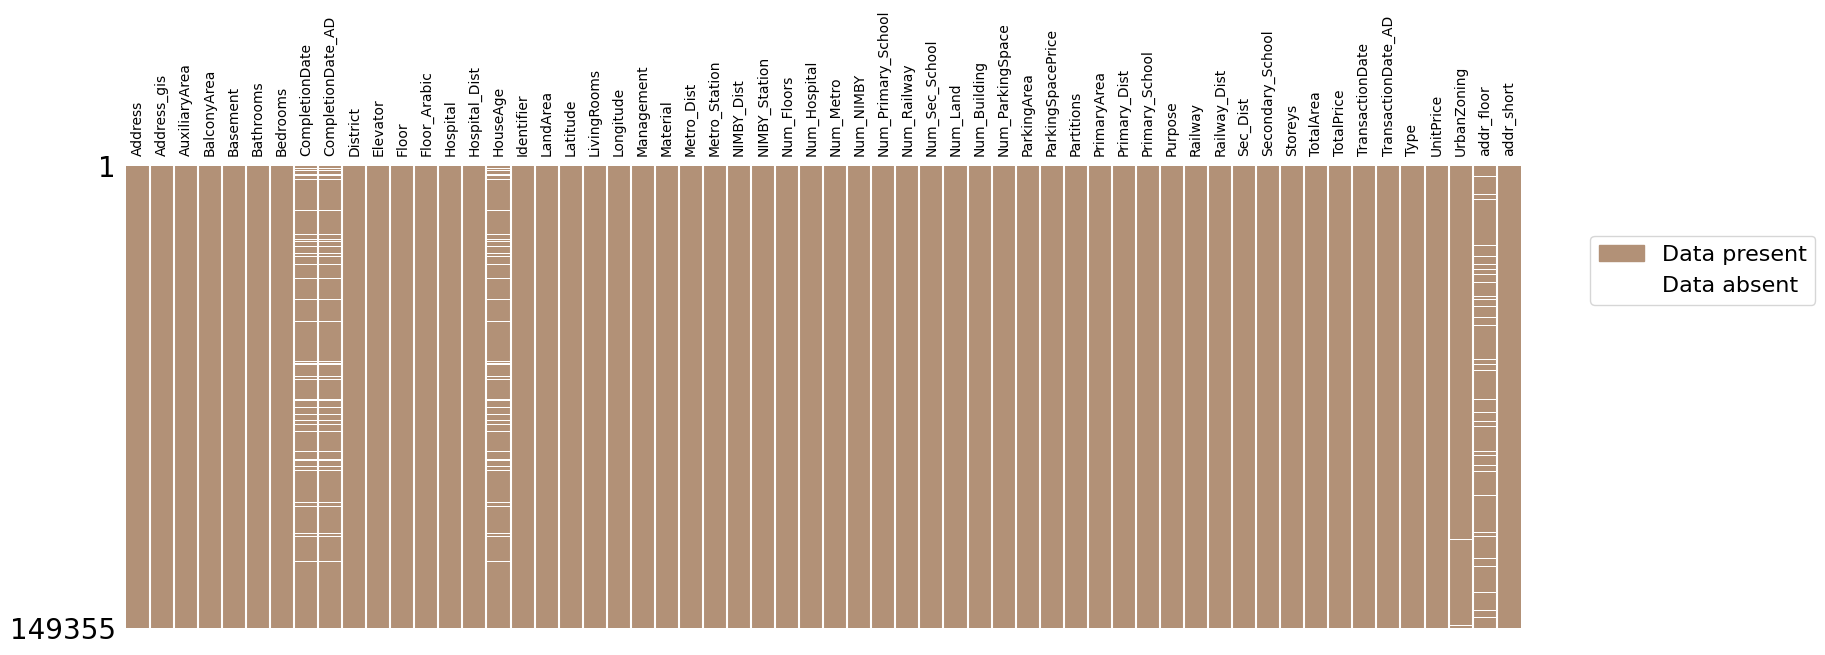

In [10]:
msno.matrix(df, sparkline=False, figsize=(18,6), fontsize=16, color=(0.7, 0.57, 0.47));
gray_patch = mpatches.Patch(color='#B29177', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent')
plt.legend(loc=[1.05,0.7], handles=[gray_patch, white_patch], fontsize=16)
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.show()

In [11]:
#查看各欄位缺失植數量
missing_values = df.isna().sum()
missing_value_true = missing_values[missing_values > 1]
print(missing_value_true)

CompletionDate       11563
CompletionDate_AD    11563
Floor                  127
HouseAge             11563
Storeys                 58
UnitPrice               11
UrbanZoning            764
addr_floor           12853
dtype: int64


In [12]:
#material_map = {'SC': 5, 'SRC': 4, 'RC': 3, 'RB': 2, 'Others': 1}